<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan. 

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "Helga Syahda Elmira"
KELAS = "KASDD D"
NPM = "2006463686"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = ["""
https://datagy.io/seaborn-pairplot/
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
https://plotly.com/python/dendrogram/
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://stackoverflow.com/questions/49844928/kmeans-object-has-no-attribute-labels
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
https://stackoverflow.com/questions/66180002/scipy-cluster-hierarchy-dendrogram-exactly-what-does-truncate-mode-level-do
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
https://jbhender.github.io/Stats506/F18/GP/Group10.html
https://www.analyticsvidhya.com/blog/2021/06/single-link-hierarchical-clustering-clearly-explained/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://journal.unnes.ac.id/sju/index.php/prisma/article/view/54590
https://towardsdatascience.com/a-practical-guide-on-k-means-clustering-ca3bef3c853d
https://fti.usn.ac.id/sinau/assets/files/KMeans.pdf
https://wiragotama.github.io/resources/ebook/parts/JWGP-intro-to-ml-chap10-secured.pdf
"""]

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Helga Syahda Elmira dari kelas KASDD D dengan NPM 2006463686, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Helga Syahda Elmira)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [ ]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [ ]:
# Jawaban no. 1

df = pd.read_csv(
    '/content/drive/MyDrive/SEMESTER 5 - Helga/KASDD/Tugas 1/penguin.csv', # Path menuju berkas dataset, dapat berupa path lokal maupun remote
)
print("Display dataset")
display(df) # Menampilkan DataFrame
print("Cuplikan dataset")
df.head() # Cuplikan dataset

Display dataset


,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Cuplikan dataset


,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [5]:
# Jawaban no. 2

print("Informasi dari dataset")
df.info()

Informasi dari dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [6]:
# Jawaban no. 3

print("Statistika deskriptif dari dataset")
df.describe()

Statistika deskriptif dari dataset


,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. Lakukan penanganan terhadap *missing values* [2]

In [27]:
# Jawaban no. 4

# Menampilkan jumlah missing values tiap kolom
print("Count missing values untuk df\n", df.isnull().sum())

# dropna untuk menghapus baris yang mengandung missing values
df_drop_row = df.dropna() 
df_drop_row['jenis_kelamin'].replace('.', df_drop_row['jenis_kelamin'].mode()[0], inplace=True) # untuk gender saya replace karena tidak dapat untuk dihapus null-nya
df_drop_row.head(5)


Count missing values untuk df
 pulau_habitat          0
panjang_paruh_atas     2
tebal_paruh_atas       2
panjang_sirip          2
massa_tubuh            2
jenis_kelamin         10
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE


Dalam menangani missing values saya menggunakan dropNa karena melihat jumlah missing values yang tidak begitu signifikan dibandingkan dengan total data yang ada. (total data yang ada 300an sedangkan missing values <=10)

5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

Visualisasi distribusi data atribut (polos)


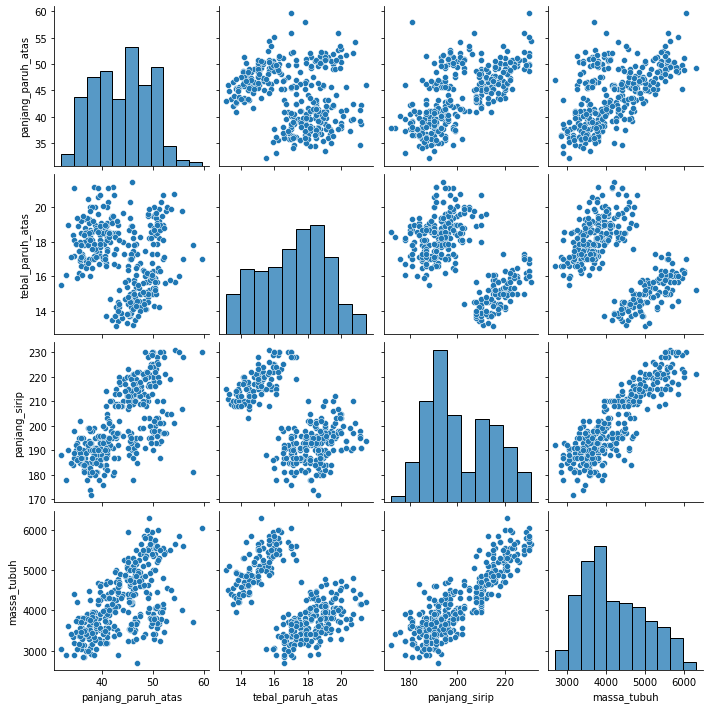

In [20]:
# Jawaban no. 5

import seaborn as sns
# Code visualisasi distribusi data dari sebuat atribut
print("Visualisasi distribusi data atribut (polos)")
sns.pairplot(df_drop_row)

Visualisasi distribusi data atribut (dengan hue atribut pulau_habitat)


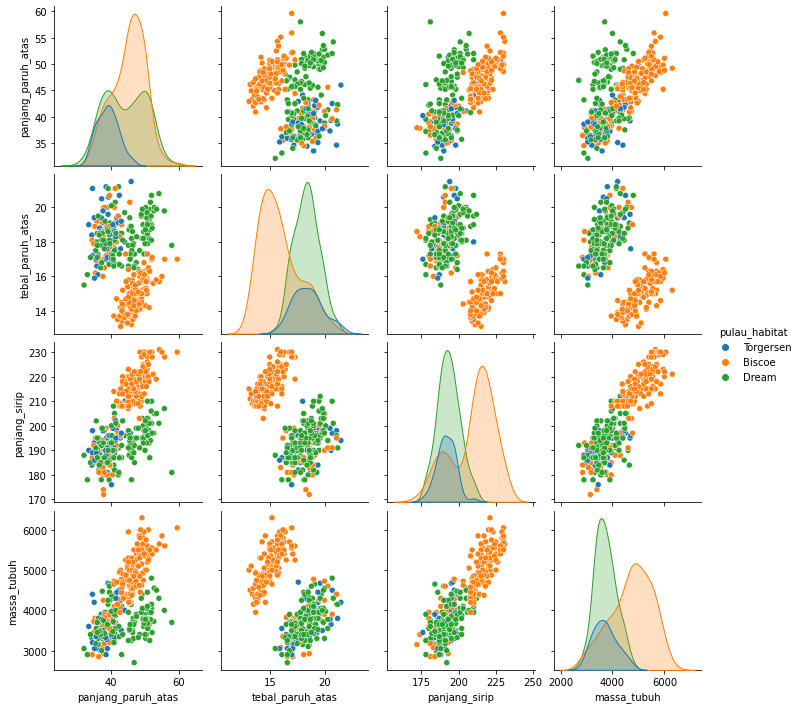

In [21]:
print("Visualisasi distribusi data atribut (dengan hue atribut pulau_habitat)")
sns.pairplot(df_drop_row,hue='pulau_habitat')

Visualisasi distribusi data atribut (dengan hue atribut jenis_kelamin)


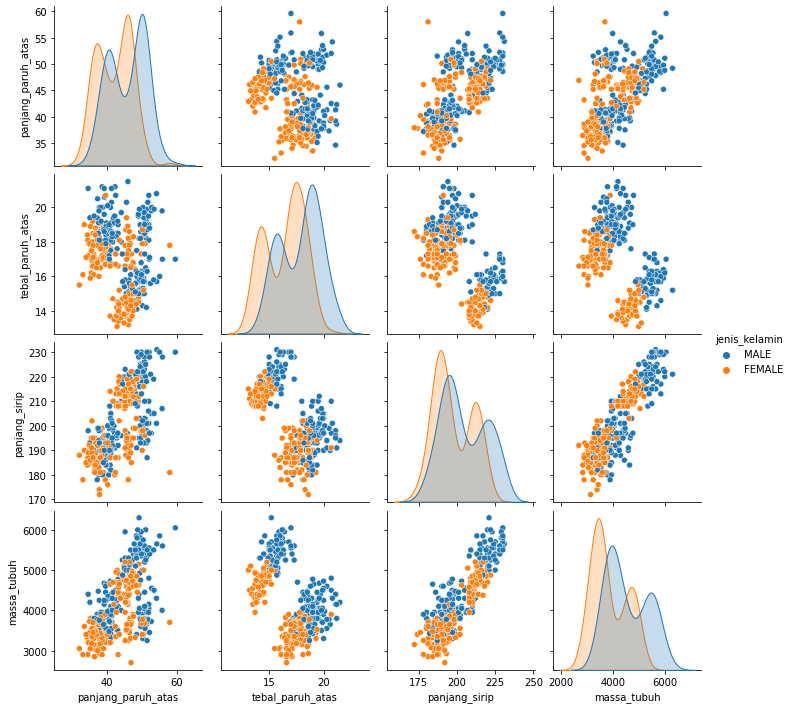

In [22]:
print("Visualisasi distribusi data atribut (dengan hue atribut jenis_kelamin)")
sns.pairplot(df_drop_row,hue='jenis_kelamin')

Visualisasi distribusi data hubungan antar dua buah atribut


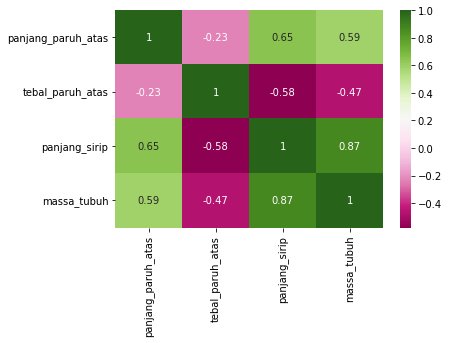

In [23]:
# Code visualisasi distribusi data untuk memahami hubungan antar dua buah atribut
print("Visualisasi distribusi data hubungan antar dua buah atribut")
sns.heatmap(df_drop_row.corr(),cmap="PiYG", annot=True)

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

## Jawaban no. 6

Saya memilih atribut tebal_paruh_atas dan panjang_sirip. Hal ini saya lakukan karena melihat pada visualisasi yang terbentuk dari nomor 5. 

1) Pada visualisasi distribusinya saya mencari data yang paling terpisah kemudian dapat dilihat yang datanya paling jelas terlihat terpisah itu ada 2 kombinasi 2 atribut, yaitu:
- tebal_paruh_atas & massa_tubuh
- tebal_paruh_atas & panjang_sirip

2) Kemudian dilanjutkan dengan visualisasi dengan heatmap, yang mana disini terlihat bahwa memang benar 2 kombinasi itu yang memiliki nilai keterhubungan terendah, namun saya ingin mengambil yang paling rendah, yaitu tebal_paruh_atas dan panjang_sirip

**Maka dari itu, saya memilih atribut tebal_paruh_atas dan panjang_sirip**

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

For n_clusters = 2 The average silhouette_score is : 0.6794155906336113
For n_clusters = 3 The average silhouette_score is : 0.5470803791751535
For n_clusters = 4 The average silhouette_score is : 0.5228848228297953
For n_clusters = 5 The average silhouette_score is : 0.5064964925935984
For n_clusters = 6 The average silhouette_score is : 0.48727296791000935


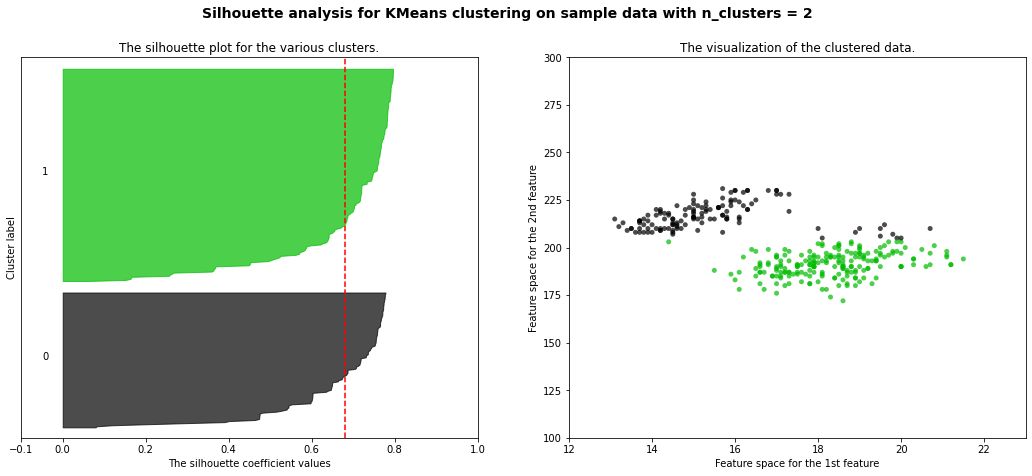

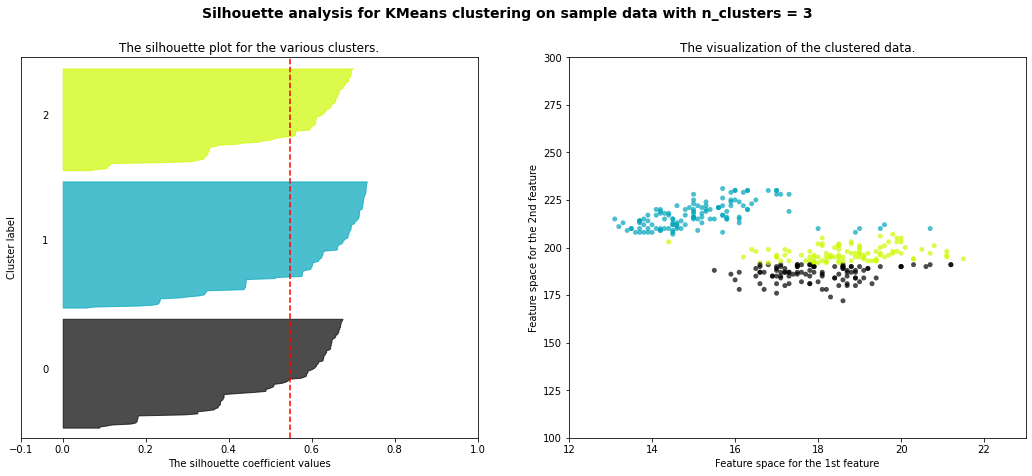

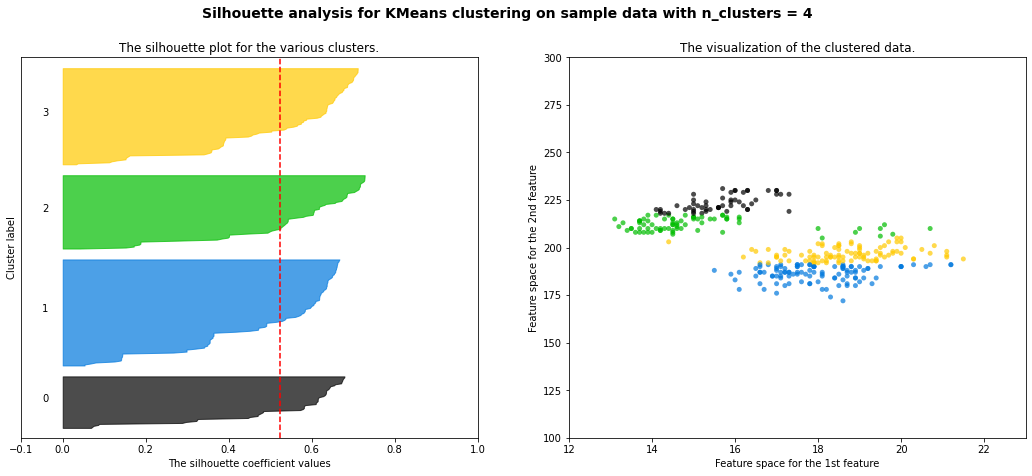

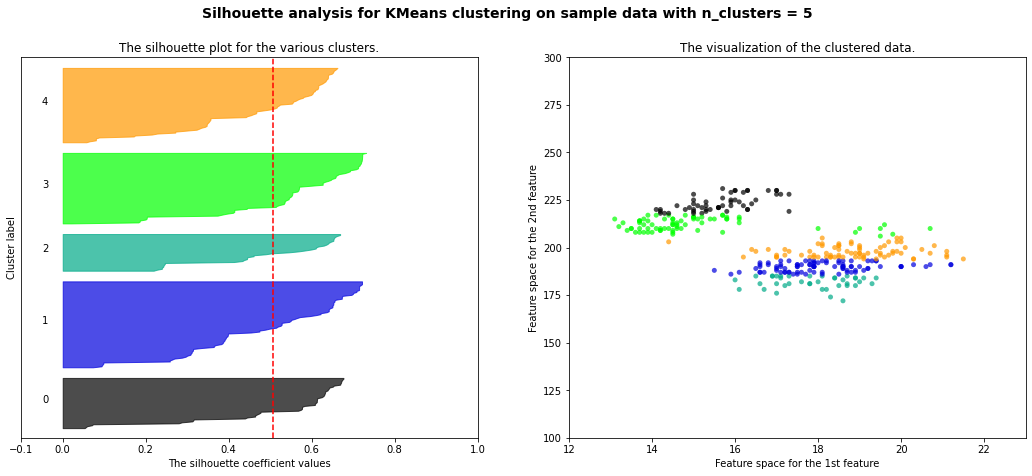

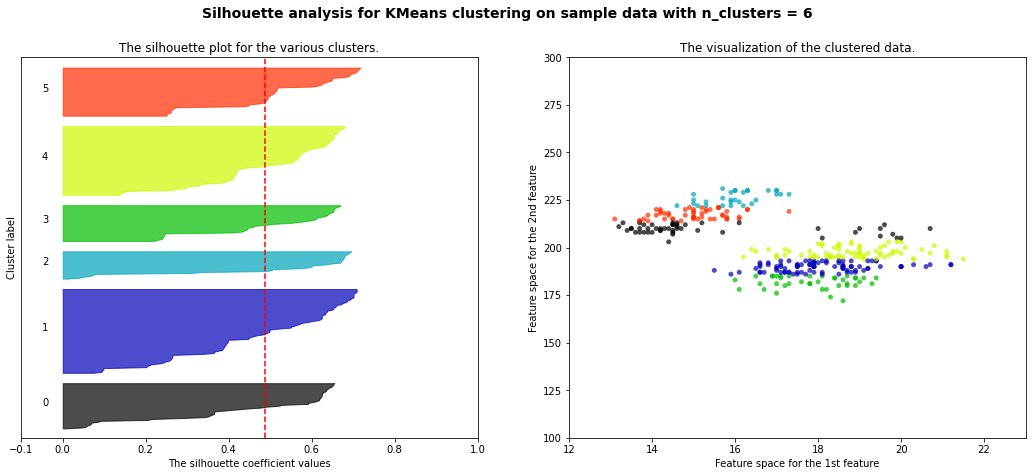

In [24]:
# Jawaban no.7

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [2, 3, 4, 5, 6]

df_drop_row1= df_drop_row[['panjang_sirip', 'tebal_paruh_atas']]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_drop_row1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_drop_row1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_drop_row1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_drop_row1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
          df_drop_row1['tebal_paruh_atas'], df_drop_row1['panjang_sirip'], marker=".", s=100, lw=0, alpha=0.7, c=colors, edgecolor="k"
      )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.set_xlim(xmin=12, xmax=23)
    ax2.set_ylim(ymin=100, ymax=300)

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Jawaban no.7
Dari hasil diatas kita bisa mendapatkan *average silhouette score* tertinggi untuk n cluster 2. 

**Maka dari itu, jawaban yang tepat untuk nilai K yang optimal adalah 2.**

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

In [28]:
# Jawaban no.8

clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(df_drop_row1)
print(clusterer)
print(cluster_labels)

KMeans(n_clusters=2, random_state=10)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


9. Visualisasikan klaster yang ada [5]

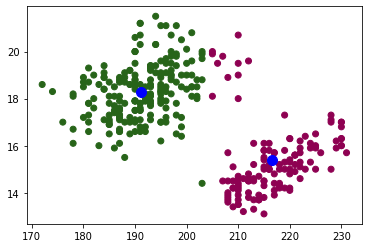

In [29]:
# Jawaban no.9 

plt.scatter(df_drop_row['panjang_sirip'], df_drop_row['tebal_paruh_atas'], c=clusterer.labels_.astype(float) , cmap='PiYG')
plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], s=100, c='blue')
plt.show()

10. Berikan interpretasi dari klaster yang dihasilkan [5]

## Jawaban no.10

Dari visualisasi klaster pada nomor 9, dapat dilihat jelas terdapat 2 kelompok klaster yang berbeda, secara visual warna hijau dan warna pink tua. Dimana masing-masing warna merepresentasikan tebal paruh atas penguin dan panjang sirip penguin. 

Seperti sebelumnya saya katakan kedua cluster ini terlihat jelas terpisah sehingga dapat disimpulkan bawa ketergantungan dua atribut ini sangat kecil atau mendekati tidak ada.

Secara visual sebenarnya dapat dilihat bahwa dua klaster ini bisa mudah dibedakan karena berkumpul di sentroid yang berbeda, hanya saja terlihat sedikit outlier. 

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


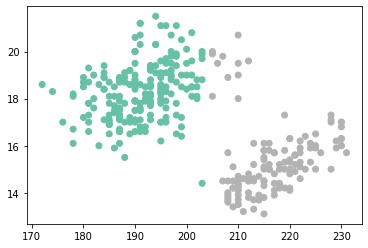

In [30]:

# Jawaban no.11

agglo = AgglomerativeClustering()
agglo_res = agglo.fit_predict(df_drop_row[['panjang_sirip', 'tebal_paruh_atas']])

plt.scatter(df_drop_row['panjang_sirip'], df_drop_row['tebal_paruh_atas'], c = agglo.labels_.astype(float), cmap="Set2")
plt.show()

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

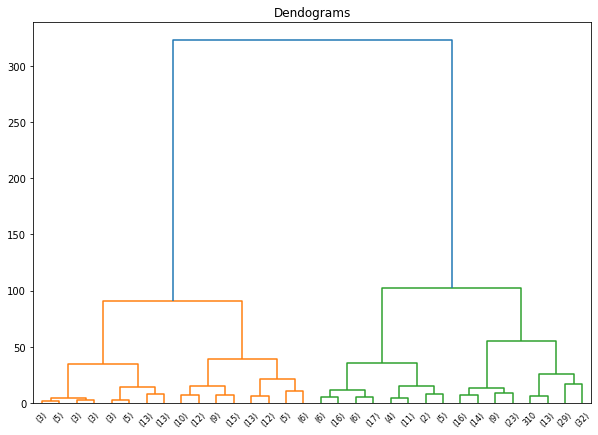

In [31]:
# Jawaban no.12
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import plotly.figure_factory as ff

plt.figure(figsize=(10, 7))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(df_drop_row[['tebal_paruh_atas','panjang_sirip']], method='ward'), truncate_mode='level', p=4) 

plt.show()

Ya, jumlah klaster optimal sama dengan hasil K-Means sebelumnya, yaitu 2. 

Hal ini dapat diketahui dari struktur hierarki dendogram. Seperti yang sudah di highlight (diwarnai-->orange dan hijau) oleh metrik validasi klaster lainnya, 2 klaster dapat dipertimbangkan untuk hierarki agglomerative.



13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [32]:
# Jawaban no.13

agglo = AgglomerativeClustering(n_clusters=2)
agglo_res = agglo.fit_predict(df_drop_row[['panjang_sirip', 'tebal_paruh_atas']])


14. Visualisasikan hasil *clustering assignment* [4]

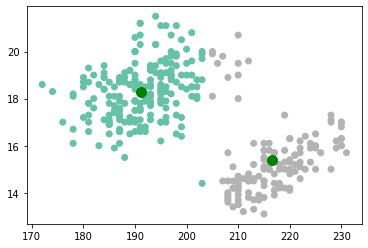

In [33]:
# Jawaban no.14
# plt.scatter(df_drop_row['panjang_sirip'], df_drop_row['tebal_paruh_atas'], c = agglo.labels_.astype(float), cmap="Set2")
# plt.show()

plt.scatter(df_drop_row['panjang_sirip'], df_drop_row['tebal_paruh_atas'], c=agglo.labels_.astype(float) ,  cmap="Set2")
plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], s=100, c='green')
plt.show()

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

 15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]  
    **Jawab:** Setelah memelajari lebih dalam mengenai *clustering*, menurut saya jika kita melakukan *clustering* sebagaimana panduan dari soal soal diatas (dengan K-Means dan *hierarchical clustering*) maka *categorital feature *perlu dibersihkan/di-*drop*/diabaikan terlebih dahulu karena dua cara *clustering* itu memang untuk *clustering* data numerik dan bukan untuk *categorical*. 

16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]  
    **Jawab:** Terkait K-Means, kita mengetahui bahwa setiap klaster memiliki sentroid. Tiap poin atau titik itu dimiliki oleh tiap klaster dengan sentroid terdekat. *K-means minimizes the sum of SSE by optimally iteratively moving the centroids*. Maka dari itu, jika ada penyebaran data yang tidak globular hasilnya tidak akan sesuai. Contohnya ada disini: https://towardsdatascience.com/a-practical-guide-on-k-means-clustering-ca3bef3c853d

17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]  
    **Jawab:** Iya. Hal ini dikarenakan pada dokumentasi scikit dikatakan adanya parameter n_init yang merupakan jumlah berapa kali algoritma k-means akan dijalankan dengan sentroid yang berbeda-beda dimana hasil terbaiklah yang akan menjadi output akhirnya, *The final results will be the best output of n_init consecutive runs in terms of inertia* .

18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]  
    **Jawab:**
    1. *intra-cluster similarity*
    Mengacu pada referensi https://wiragotama.github.io/resources/ebook/parts/JWGP-intro-to-ml-chap10-secured.pdf
    Menghitung rata-rata kedekatan antara suatu anggota dan anggota dalam klaster. Hal ini dilakukan dengan rumus 1 dibagi banyaknya jumlah anggota klaster dikuadratkan kemudian dikalikan sigma cosSim(di,dj) dengan D kumpulan data suatu klaster D = {d1, d2, ··· , dN }. 
    - Gambar rumus ada di tautan referensi dengan halaman 139 gambar (10.6)

    2. *inter-cluster dissimilarity*
    Mengacu pada referensi https://wiragotama.github.io/resources/ebook/parts/JWGP-intro-to-ml-chap10-secured.pdf
    Tidak ada disimilaritas adanya rumus similaritas namun bisa kita kaitkan dengan memutar kata-katanya. Untuk rumus similaritas dihitung dengan *cosine similarity* antara sentroid suatu klaster dan sentroid dari seluruh data. 
    - Gambar rumus ada di tautan referensi dengan halaman 139 gambar (10.9)

    Dapat disimpulkan klaster dianggap baik berdasarkan kedua metrik di atas:
    - Semakin tinggi kemiripan anggota pada suatu klaster, semakin baik kualitas klaster tersebut. *(intra-cluster similarity* tinggi)
    - Semakin kecil kemiripan anggota klaster yang satu dengan klaster lainya, maka semakin baik kualitas clustering (*inter-cluster similarity* rendah/(*inter-cluster dissimilarity* tinggi))
